In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [15]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


This image is: 0


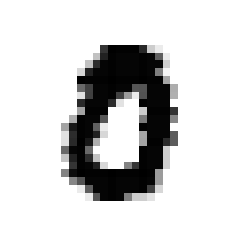

In [23]:
check_index = 69
plt.imshow(X[check_index].reshape(28,28), cmap='binary')
plt.axis("off")
print("This image is:", y[check_index])
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, shuffle=True, random_state = 24)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 63000)
(784, 7000)
(63000,)
(7000,)


### Normalizing the dataset

In [18]:
X_train, X_test = X_train/255, X_test/255

In [19]:
number_of_output_layers = 10
layer_sizes = [X.shape[1], 128, 64, number_of_output_layers]
# L is the index of the output layer or number of layers
L = len(layer_sizes)-1
print(X.shape[1],L)

784 3


### Random initialization of the parameters

In [20]:
def initialize_parameters(layer_sizes):

  parameters = {}
  for index, layer_size in enumerate(layer_sizes):

    if index==0:
      continue

    parameters['W'+str(index)] = np.random.randn(layer_sizes[index], layer_sizes[index-1])*0.01
    parameters['b'+str(index)] = np.zeros((layer_sizes[index], 1))

  return parameters

### Activation Functions

In [26]:
def sigmoid(Z):
  return(1/(1 + np.exp(-Z)))

def ReLU(Z):
  return(np.maximum(0, Z))

In [30]:
def linear_activation_layer(W, A_prev, b, activation_function):

  Z = np.dot(W, A_prev) + b
  A = 0
  if(activation_function == "relu"):
    A = ReLU(Z)
  elif(activatioon_function == "sigmoid"):
    A = sigmoid(Z)

  return(A, W, b, Z)

### Forward Propagation

In [38]:
def forward_propagation(X, parameters):

  caches = []
  A_prev = X
  L = len(parameters) // 2
  
  for l in range(1, L):
    A, cache = linear_activation_layer(parameters['W'+ str(l)], A_prev, parameters['b' + str(l)], "relu")
    caches.append(A, cache)
    A_prev = A

  AL, cache = linear_activation_layer(parameters['W'+ str(L)], A_prev, parameters['b' + str(L)], "sigmoid")
  caches.append(AL, cache)

  return(AL, caches)

### Cost function

In [ ]:
def cost(AL, Y):
  